In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy  as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
train_data = pd.read_csv('../feature_engineering/data_train.csv')
test_data = pd.read_csv('../feature_engineering/data_test_final.csv')

print(train_data.shape)
print(test_data.shape)

(1243, 11)
(372, 11)


In [3]:
X_train = train_data.drop('Phân Loại',axis=1)
y_train = train_data['Phân Loại']

In [4]:
X_test = test_data.drop('Phân Loại', axis = 1)
y_test = test_data['Phân Loại']

In [46]:
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)


In [5]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

Accuracy score: 0.63
Precision (macro-average): 0.65
Recall (macro-average): 0.56
F1-score (macro-average): 0.58
Classification report:
                                 precision    recall  f1-score   support

Di động / Mỏng nhẹ / Ultrabook       0.70      0.53      0.60        96
                        Gaming       0.72      0.83      0.77        66
          Kỹ thuật / Lập trình       0.59      0.73      0.65        81
    Laptop 2 trong 1 / Cảm ứng       0.86      0.30      0.44        20
  Thiết kế đồ họa / Multimedia       0.55      0.63      0.59        89
           Văn phòng / Học tập       0.47      0.35      0.40        20

                      accuracy                           0.63       372
                     macro avg       0.65      0.56      0.58       372
                  weighted avg       0.64      0.63      0.62       372



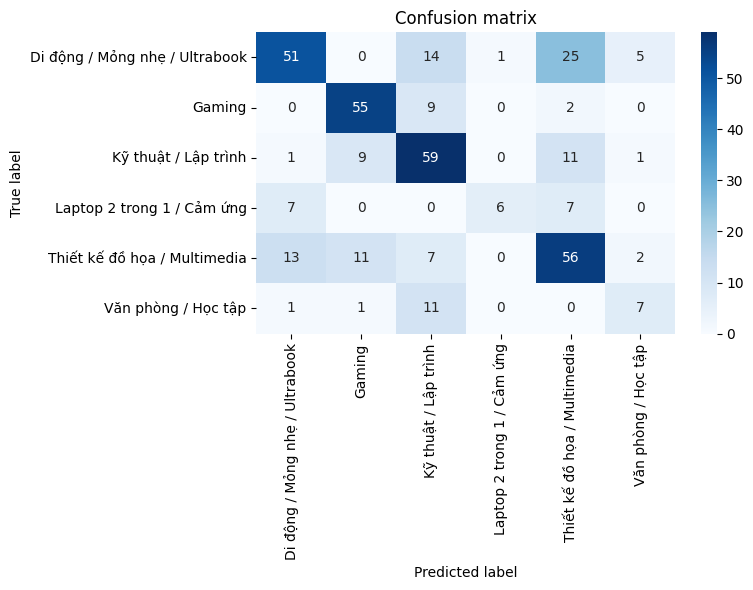

In [6]:
# Ma trận nhầm lẫn
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Độ chính xác tổng thể
print("Accuracy score:", round(accuracy_score(y_test, y_pred), 2))
print("Precision (macro-average):", round(precision_score(y_test, y_pred, average='macro'), 2))
print("Recall (macro-average):", round(recall_score(y_test, y_pred, average='macro'), 2))
print("F1-score (macro-average):",  round(f1_score(y_test, y_pred, average='macro'), 2))

# Báo cáo độ chính xác
print("Classification report:\n", classification_report(y_test, y_pred))


# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = model.classes_ if hasattr(model, 'classes_') else sorted(list(set(y_test)))
# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.tight_layout()
plt.show()

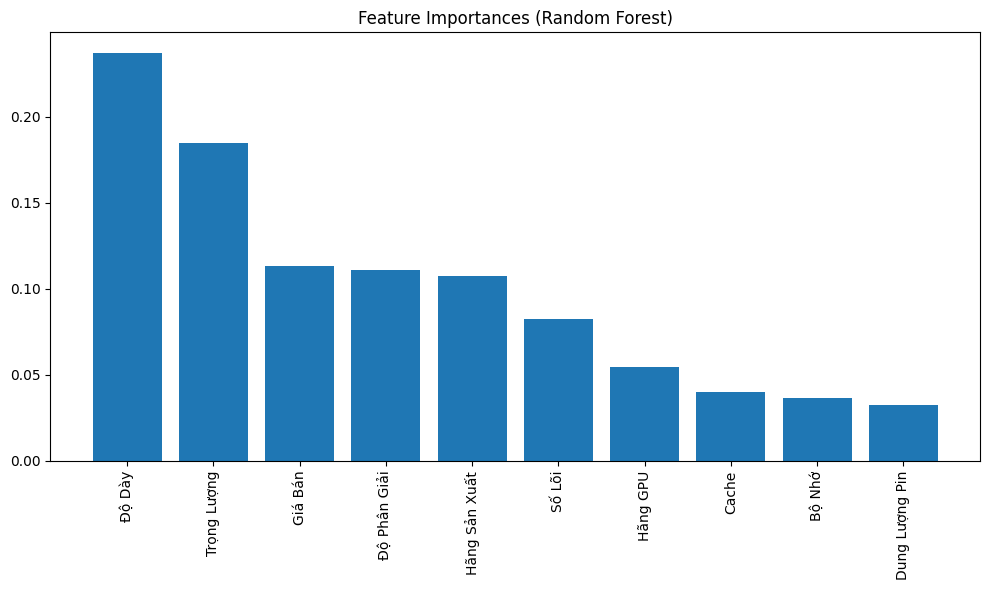

In [7]:
importances = model.feature_importances_
feature_names = X_train.columns

# Sắp xếp giảm dần
indices = np.argsort(importances)[::-1]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

In [8]:
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

In [9]:
# Chọn các đặc trưng có importance > 0.05
selected_feats = feat_imp_df[feat_imp_df['Importance'] > 0.05]

print("Các đặc trưng quan trọng (importance > 0.05):")
print(selected_feats.sort_values(by='Importance', ascending=False))

Các đặc trưng quan trọng (importance > 0.05):
         Feature  Importance
1         Độ Dày    0.237220
2    Trọng Lượng    0.184771
5        Giá Bán    0.113249
8   Độ Phân Giải    0.110720
0  Hãng Sản Xuất    0.107701
6         Số Lõi    0.082510
9       Hãng GPU    0.054803


In [10]:
selected_columns = selected_feats['Feature'].tolist()

X_train_selected = X_train[selected_columns]
X_test_selected = X_test[selected_columns]

In [11]:
random_grid = {'n_estimators': [100, 200, 300],
               'max_features': ['sqrt', 'log2'],
               'max_depth': [10, 20, 30, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}
print(random_grid)

{'n_estimators': [100, 200, 300], 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [12]:
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [13]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': False}

Accuracy score: 0.63
Precision (macro-average): 0.65
Recall (macro-average): 0.56
F1-score (macro-average): 0.58
Classification report:
                                 precision    recall  f1-score   support

Di động / Mỏng nhẹ / Ultrabook       0.70      0.53      0.60        96
                        Gaming       0.72      0.83      0.77        66
          Kỹ thuật / Lập trình       0.59      0.73      0.65        81
    Laptop 2 trong 1 / Cảm ứng       0.86      0.30      0.44        20
  Thiết kế đồ họa / Multimedia       0.55      0.63      0.59        89
           Văn phòng / Học tập       0.47      0.35      0.40        20

                      accuracy                           0.63       372
                     macro avg       0.65      0.56      0.58       372
                  weighted avg       0.64      0.63      0.62       372



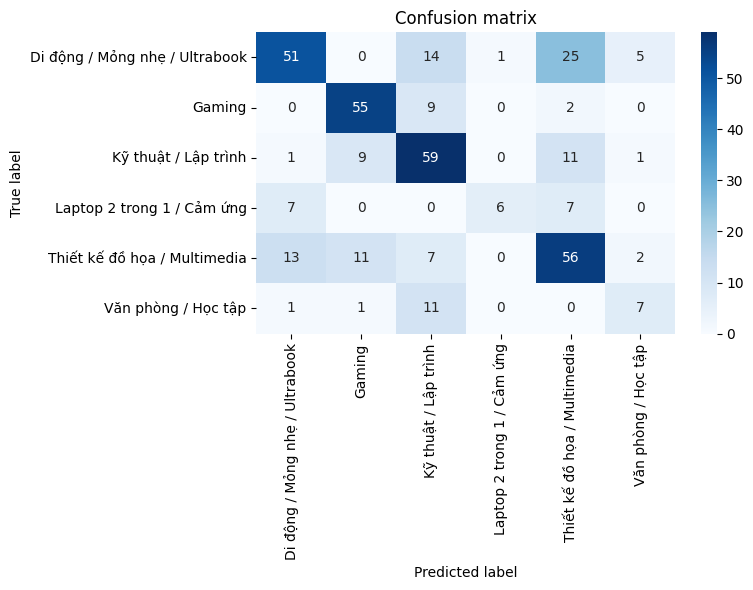

In [14]:
# Ma trận nhầm lẫn
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Độ chính xác tổng thể
print("Accuracy score:", round(accuracy_score(y_test, y_pred), 2))
print("Precision (macro-average):", round(precision_score(y_test, y_pred, average='macro'), 2))
print("Recall (macro-average):", round(recall_score(y_test, y_pred, average='macro'), 2))
print("F1-score (macro-average):",  round(f1_score(y_test, y_pred, average='macro'), 2))

# Báo cáo độ chính xác
print("Classification report:\n", classification_report(y_test, y_pred))


# Tính toán confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = model.classes_ if hasattr(model, 'classes_') else sorted(list(set(y_test)))
# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.tight_layout()
plt.show()

Accuracy: 0.62
Precision (macro-average): 0.67
Recall (macro-average): 0.55
F1-score (macro-average): 0.57

Classification report:
                                 precision    recall  f1-score   support

Di động / Mỏng nhẹ / Ultrabook       0.69      0.52      0.60        96
                        Gaming       0.71      0.83      0.77        66
          Kỹ thuật / Lập trình       0.58      0.72      0.64        81
    Laptop 2 trong 1 / Cảm ứng       1.00      0.25      0.40        20
  Thiết kế đồ họa / Multimedia       0.55      0.64      0.59        89
           Văn phòng / Học tập       0.47      0.35      0.40        20

                      accuracy                           0.62       372
                     macro avg       0.67      0.55      0.57       372
                  weighted avg       0.64      0.62      0.61       372



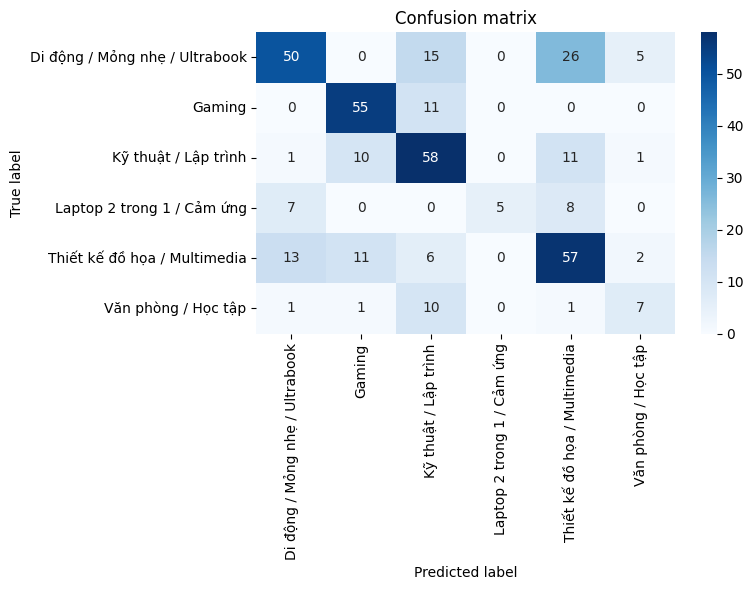

In [15]:
def evaluate(model, X, y):
    y_pred = model.predict(X)

    print("Accuracy:", round(accuracy_score(y, y_pred), 2))
    print("Precision (macro-average):", round(precision_score(y, y_pred, average='macro'), 2))
    print("Recall (macro-average):", round(recall_score(y, y_pred, average='macro'), 2))
    print("F1-score (macro-average):",  round(f1_score(y, y_pred, average='macro'), 2))
    # print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
    print("\nClassification report:\n", classification_report(y, y_pred))
    
    cm = confusion_matrix(y, y_pred)
    labels = model.classes_ if hasattr(model, 'classes_') else sorted(list(set(y)))
    # Vẽ biểu đồ
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion matrix')
    plt.tight_layout()
    plt.show()

best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)